# **Laboratorium 6**

## Sieć samoorganizująca

###Zadanie 1, implementacja sieci samoorganizującej

In [68]:
import numpy as np
# 100 punktów losowo rozmieszczone wokół punku (-1,-1)
xx1=np.zeros([100,2])
xx1[:,0]=np.random.normal(-1,1,100) #współrzędne 0 (oś X)
xx1[:,1]=np.random.normal(-1,1,100) #współrzędne 1 (oś Y)

In [69]:
# 100 punktów losowo rozmieszczone wokół punku (3,1)
xx2=np.zeros([100,2])
xx2[:,0]=np.random.normal(+3,1,100)
xx2[:,1]=np.random.normal(+1,1,100)

In [70]:
#połączenie punktów w jedną tablicę
x=np.concatenate([xx1,xx2])

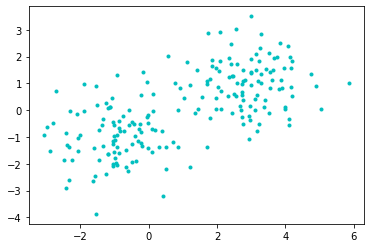

In [71]:
import matplotlib.pyplot as plt

plt.plot(x[:,0],x[:,1],'c.')
plt.show()

In [72]:
N=2 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)
#dwa neurony posiadają po 2 wagi
#zapis w[0,1] oznacza drugą wagę pierwszego neuronu
#numeracja od 0

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[-1.36276525  0.35366485]
 [ 1.90108109 -1.89382226]]


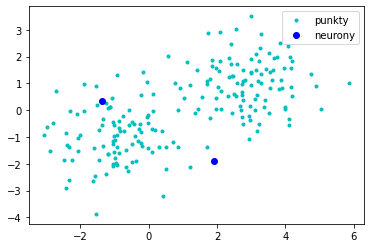

In [73]:
#wagi neuronów w sieci samoorganizującej są jednocześnie współrzędnymi, więć można nanieść je również na wykres
plt.plot(x[:,0],x[:,1],'c.',label="punkty")
plt.plot(wagi[:,0],wagi[:,1],'bo',label="neurony")
plt.legend()
plt.show()

In [74]:
import math

def zwyciezca(xx):
  d=np.zeros(N)
  for i in range(N):
    for n in range(M):
      d[i] += (xx[n]-wagi[i,n])**2
    d[i]=math.sqrt(d[i])
    print("Odleglość neuronu nr",i,wagi[i],"od punktu",xx,"wynosi",d[i])
  z=np.argmin(d)
  print("Zwycięzcą jest neuron nr",z)
  return z

In [75]:
print(wagi)
zwyciezca([0,0])

[[-1.36276525  0.35366485]
 [ 1.90108109 -1.89382226]]
Odleglość neuronu nr 0 [-1.36276525  0.35366485] od punktu [0, 0] wynosi 1.40790907136294
Odleglość neuronu nr 1 [ 1.90108109 -1.89382226] od punktu [0, 0] wynosi 2.683406801921465
Zwycięzcą jest neuron nr 0


0

In [76]:
def zwyciezca(xx):
  for i in range(N):
    d[i]=0
  for i in range(N):
    for n in range(M):
      d[i] += (xx[n]-wagi[i,n])**2
    d[i]=math.sqrt(d[i])
  z=np.argmin(d)
  return z

In [77]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(x)):           #iteracje przez punkty wejściowe
    xx=x[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1
    

Liczba wykonanych pełnych iteracji: 40


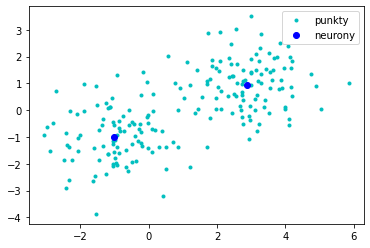

In [78]:
plt.plot(x[:,0],x[:,1],'c.',label="punkty")
plt.plot(wagi[:,0],wagi[:,1],'bo',label="neurony")
plt.legend()
plt.show()

In [79]:
klasa=np.zeros(len(x))
for i in range(len(x)):
  z=zwyciezca(x[i])
  klasa[i]=z

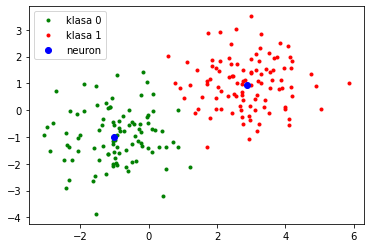

In [80]:
plt.plot(x[klasa[:]==0,0], x[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(x[klasa[:]==1,0], x[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

### Zadanie 2

In [81]:
#nowe 100 punktów losowo rozmieszczonych wokół punku (2,-4)
xx3=np.zeros([100,2])
xx3[:,0]=np.random.normal(+2,1,100)
xx3[:,1]=np.random.normal(-4,1,100)

In [82]:
#połączenie punktów w jedną tablicę
x=np.concatenate([x,xx3])

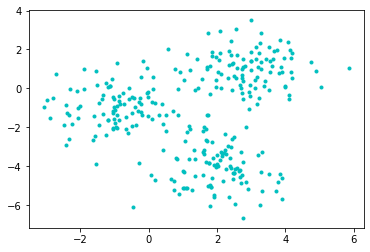

In [83]:
plt.plot(x[:,0],x[:,1],'c.')
plt.show()

**Próba dla 2 neuronów**

In [84]:
N=2 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[-1.23324163  1.98865555]
 [-1.62288981 -1.41902859]]


In [85]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(x)):           #iteracje przez punkty wejściowe
    xx=x[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1
    

Liczba wykonanych pełnych iteracji: 31


In [86]:
klasa=np.zeros(len(x))
for i in range(len(x)):
  z=zwyciezca(x[i])
  klasa[i]=z

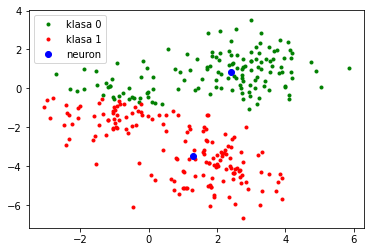

In [87]:
plt.plot(x[klasa[:]==0,0], x[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(x[klasa[:]==1,0], x[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

**Próba dla 3 neuronów**

In [88]:
N=3 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[-1.02719068  1.89186682]
 [-1.05619551 -0.44134656]
 [ 0.7770063  -0.58927881]]


In [89]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(x)):           #iteracje przez punkty wejściowe
    xx=x[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1
    

Liczba wykonanych pełnych iteracji: 44


In [90]:
klasa=np.zeros(len(x))
for i in range(len(x)):
  z=zwyciezca(x[i])
  klasa[i]=z

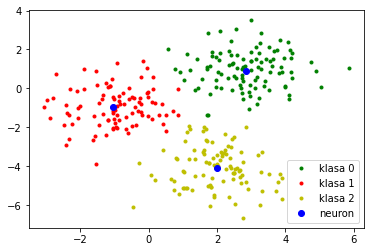

In [91]:
plt.plot(x[klasa[:]==0,0], x[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(x[klasa[:]==1,0], x[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(x[klasa[:]==2,0], x[klasa[:]==2,1], 'y.', label="klasa 2")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

**Próba dla 4 neuronów**

In [92]:
N=4 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[-0.65260847  1.99786238]
 [ 1.75645124 -1.98695579]
 [ 1.30852961 -1.09030782]
 [-1.98747692  1.8362793 ]]


In [93]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(x)):           #iteracje przez punkty wejściowe
    xx=x[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1
    

Liczba wykonanych pełnych iteracji: 114


In [94]:
klasa=np.zeros(len(x))
for i in range(len(x)):
  z=zwyciezca(x[i])
  klasa[i]=z

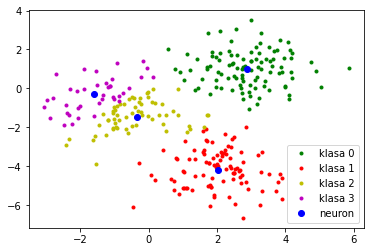

In [95]:
plt.plot(x[klasa[:]==0,0], x[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(x[klasa[:]==1,0], x[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(x[klasa[:]==2,0], x[klasa[:]==2,1], 'y.', label="klasa 2")
plt.plot(x[klasa[:]==3,0], x[klasa[:]==3,1], 'm.', label="klasa 3")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

### Zadanie 3

In [96]:
# 100 punktów losowych punktów z zakresu (-2,2), zbiór jednorodny
xx4=np.random.random([100,2])*4-2

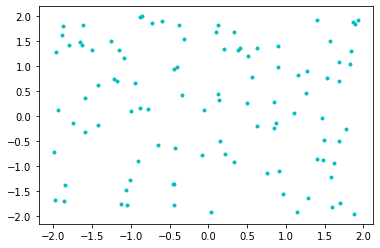

In [97]:
plt.plot(xx4[:,0],xx4[:,1],'c.')
plt.show()

**Próba dla 2 neuronów**

In [98]:
N=2 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[ 0.75611674 -0.02734215]
 [-0.54154767 -1.88552507]]


In [99]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(xx4)):           #iteracje przez punkty wejściowe
    xx=xx4[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1

Liczba wykonanych pełnych iteracji: 96


In [100]:
klasa=np.zeros(len(xx4))
for i in range(len(xx4)):
  z=zwyciezca(xx4[i])
  klasa[i]=z

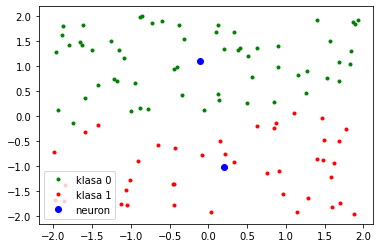

In [101]:
plt.plot(xx4[klasa[:]==0,0], xx4[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(xx4[klasa[:]==1,0], xx4[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

**Próba dla 3 neuronów**

In [102]:
N=3 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[ 0.13988381  1.94880127]
 [-1.121676   -0.44730649]
 [-1.72323996  0.95062298]]


In [103]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(xx4)):           #iteracje przez punkty wejściowe
    xx=xx4[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1

Liczba wykonanych pełnych iteracji: 120


In [104]:
klasa=np.zeros(len(xx4))
for i in range(len(xx4)):
  z=zwyciezca(xx4[i])
  klasa[i]=z

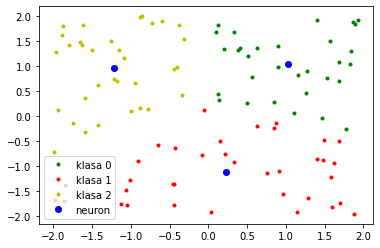

In [105]:
plt.plot(xx4[klasa[:]==0,0], xx4[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(xx4[klasa[:]==1,0], xx4[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(xx4[klasa[:]==2,0], xx4[klasa[:]==2,1], 'y.', label="klasa 2")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()

**Próba dla 5 neuronów**

In [106]:
N=5 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[-1.54885663 -1.70316089]
 [ 0.61334579 -1.50138923]
 [ 1.63794589 -0.86665868]
 [ 0.31760299  1.60158563]
 [-1.76970376  0.94470291]]


In [107]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(xx4)):           #iteracje przez punkty wejściowe
    xx=xx4[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1

Liczba wykonanych pełnych iteracji: 341


In [108]:
klasa=np.zeros(len(xx4))
for i in range(len(xx4)):
  z=zwyciezca(xx4[i])
  klasa[i]=z

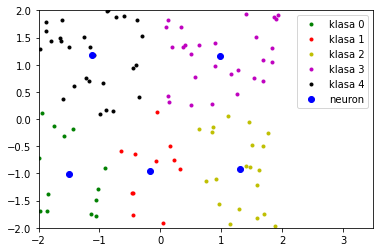

In [109]:
plt.plot(xx4[klasa[:]==0,0], xx4[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(xx4[klasa[:]==1,0], xx4[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(xx4[klasa[:]==2,0], xx4[klasa[:]==2,1], 'y.', label="klasa 2")
plt.plot(xx4[klasa[:]==3,0], xx4[klasa[:]==3,1], 'm.', label="klasa 3")
plt.plot(xx4[klasa[:]==4,0], xx4[klasa[:]==4,1], 'k.', label="klasa 4")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.axis([-2,3.5,-2,2])
plt.show()

**Próba dla 8 neuronów**

In [110]:
N=8 #liczba neuronów
M=2 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[ 0.58834378 -1.8949107 ]
 [-1.57566132 -1.3284337 ]
 [-1.63496512 -0.44998883]
 [-1.40659478  1.12632835]
 [ 0.03246305  0.04917725]
 [ 1.1731621   1.0901614 ]
 [-0.17557727  0.81590803]
 [ 0.76817389 -0.47318798]]


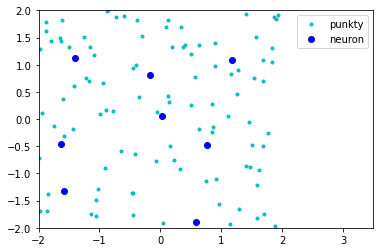

In [111]:
plt.plot(xx4[:,0], xx4[:,1], 'c.', label="punkty")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.axis([-2,3.5,-2,2])
plt.show()

In [112]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(xx4)):           #iteracje przez punkty wejściowe
    xx=xx4[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1

Liczba wykonanych pełnych iteracji: 347


In [113]:
klasa=np.zeros(len(xx4))
for i in range(len(xx4)):
  z=zwyciezca(xx4[i])
  klasa[i]=z

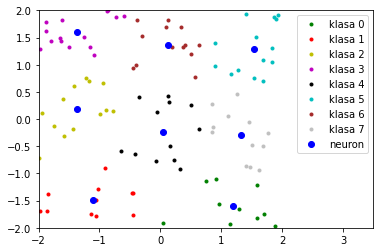

In [114]:
plt.plot(xx4[klasa[:]==0,0], xx4[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(xx4[klasa[:]==1,0], xx4[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(xx4[klasa[:]==2,0], xx4[klasa[:]==2,1], 'y.', label="klasa 2")
plt.plot(xx4[klasa[:]==3,0], xx4[klasa[:]==3,1], 'm.', label="klasa 3")
plt.plot(xx4[klasa[:]==4,0], xx4[klasa[:]==4,1], 'k.', label="klasa 4")
plt.plot(xx4[klasa[:]==5,0], xx4[klasa[:]==5,1], 'c.', label="klasa 5")
plt.plot(xx4[klasa[:]==6,0], xx4[klasa[:]==6,1], color='brown',marker='.',linestyle='None',label="klasa 6")
plt.plot(xx4[klasa[:]==7,0], xx4[klasa[:]==7,1], color='silver',marker='.',linestyle='None',label="klasa 7")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.axis([-2,3.5,-2,2])
plt.show()

### Zadanie 4

In [115]:
# 100 punktów losowo rozmieszczone wokół punku (-1,-1,-1)
x3dx1=np.zeros([100,3])
x3dx1[:,0]=np.random.normal(-1,1,100) #współrzędne 0 (oś X)
x3dx1[:,1]=np.random.normal(-1,1,100) #współrzędne 1 (oś Y)
x3dx1[:,2]=np.random.normal(-1,1,100) #współrzędne 2 (oś Z)

In [116]:
# 100 punktów losowo rozmieszczone wokół punku (3,1,2)
x3dx2=np.zeros([100,3])
x3dx2[:,0]=np.random.normal(+3,1,100) #współrzędne 0 (oś X)
x3dx2[:,1]=np.random.normal(+1,1,100) #współrzędne 1 (oś Y)
x3dx2[:,2]=np.random.normal(+2,1,100) #współrzędne 2 (oś Z)

In [117]:
# 100 punktów losowo rozmieszczone wokół punku (2,-3,-4)
x3dx3=np.zeros([100,3])
x3dx3[:,0]=np.random.normal(+2,1,100) #współrzędne 0 (oś X)
x3dx3[:,1]=np.random.normal(-3,1,100) #współrzędne 1 (oś Y)
x3dx3[:,2]=np.random.normal(-4,1,100) #współrzędne 2 (oś Z)

In [118]:
#połączenie punktów w jedną tablicę
x3d=np.concatenate([x3dx1,x3dx2,x3dx3])

In [119]:
N=3 #liczba neuronów
M=3 #liczba wag(liczba współrzędnych punktów)

wagi=np.random.random([N,M])*4-2  #wagi są losowane z zakresu (-2,2)
print("Wartości wag:")
print(wagi)

Wartości wag:
[[-1.53456142  1.10324493 -1.86627746]
 [-1.07479441 -1.82790848 -1.3751811 ]
 [ 1.03439961  0.39197641  0.91554622]]


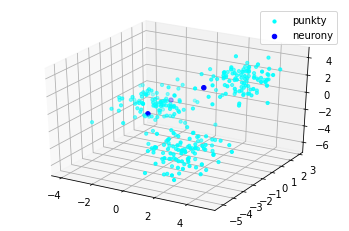

In [120]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')

ax.scatter(x3d[:,0],x3d[:,1],x3d[:,2],c='cyan',s=10,label="punkty")
ax.scatter(wagi[:,0],wagi[:,1],wagi[:,2],c='blue',label="neurony")
ax.legend()
plt.show()

In [121]:
mi=0.01 #współczynnik uczenia
d=np.zeros(N) #aktualna średnia odległość E
dd=np.zeros([N,len(x)]) #tablica zawierająca średnią odległość E z poprzedniej iteracji /zadanie1

#proces uczenia // WTA - Winner Takes All
for iter in range(1000):            #maksymalna liczba pełnych iteracji
  f=0                               #iterator zmian /zadanie1
  for i in range(len(x)):           #iteracje przez punkty wejściowe
    xx=x3d[i]
    z=zwyciezca(xx)
    for j in range(M):  #iteracje po wagach zwycięskiego neuronu
      wagi[z,j]=wagi[z,j]+mi*(xx[j]-wagi[z,j])    #modyfikacja wag zwycięskiego neuronu
    if d[z]!=dd[z,i]:         #jesli odleglosc ulegla zmianie /zadanie 1
      f+=1                    #zwieksz iterator zmian o 1 /zadanie 1
    dd[z,i]=d[z]              #nowa wartość E zastępuje tą z poprzedniej iteracji
  if f==0:            #jeśli średnia odległośc między punktami a wagami neuronu zwycięzcy
    print("Liczba wykonanych pełnych iteracji:",iter+1) #nie uległa zmianie (ani razu <=> f==0)
    break                                               #przerwij pętle /zadanie1
    

Liczba wykonanych pełnych iteracji: 46


In [122]:
klasa=np.zeros(len(x3d))
for i in range(len(x3d)):
  z=zwyciezca(x3d[i])
  klasa[i]=z

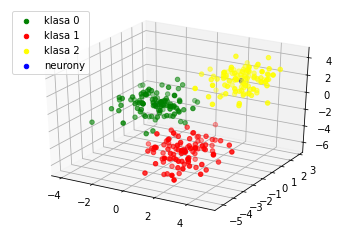

In [123]:
fig=plt.figure()
ax=fig.gca(projection='3d')

ax.scatter(x3d[klasa[:]==0,0],x3d[klasa[:]==0,1],x3d[klasa[:]==0,2],c='green',label="klasa 0")
ax.scatter(x3d[klasa[:]==1,0],x3d[klasa[:]==1,1],x3d[klasa[:]==1,2],c='red',label="klasa 1")
ax.scatter(x3d[klasa[:]==2,0],x3d[klasa[:]==2,1],x3d[klasa[:]==2,2],c='yellow',label="klasa 2")
ax.scatter(wagi[:,0],wagi[:,1],wagi[:,2],c='blue',label="neurony")
ax.legend()
plt.show()

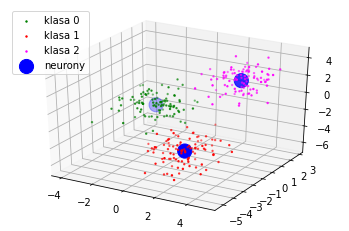

In [124]:
fig=plt.figure()
ax=fig.gca(projection='3d')

ax.scatter(x3d[klasa[:]==0,0],x3d[klasa[:]==0,1],x3d[klasa[:]==0,2],s=2,c='green',label="klasa 0")
ax.scatter(x3d[klasa[:]==1,0],x3d[klasa[:]==1,1],x3d[klasa[:]==1,2],s=2,c='red',label="klasa 1")
ax.scatter(x3d[klasa[:]==2,0],x3d[klasa[:]==2,1],x3d[klasa[:]==2,2],s=2,c='magenta',label="klasa 2")
ax.scatter(wagi[:,0],wagi[:,1],wagi[:,2],c='blue',s=200,label="neurony")
ax.legend()
plt.show()